#**Sentiment analysis on Cracco Milano restaurant reviews**

Located in Galleria Vittorio Emanuele II – a glass-roofed shopping centre dating back to 1877 – [***Cracco’s***](https://www.ristorantecracco.it/en/) one of the most famous restaurants in the **city of Milan**.His interiors are gloriously decadent, with hand-painted wall paper, mosaic tiles and antique mirrors. 

Inside, the atmosphere is old Milan from the end of the 19th century, mixed with Art Nouveau, the expression of a set of architectural styles ranging from the second half of the 19th century to Gio Ponti, an idea of the Milanese style that is simple, polished and light, exuding intuitive imagination.

The exquisite design of this four-floor culinary paradise is just as compelling as the incredibly innovative food.

**Carlo Cracco**, one of Italy's most famous chefs, serves Milanese food with a modern spin. Think raw veal with a twist of lemon peel, a riff on the traditional cutlet, crème brulée with seasonal Italian olive oil and electric-yellow spaghetti made from egg yolks. The site also includes a bakery, bar and wine cellar containing 10,000 bottles of mostly Italian and French wines.


---


In this project, I will do sentiment classification of the restaurant's reviews from Yelp. Nowadays restaurants want to understand people’s opinions about their food and service. Performing sentiment analysis, I aim to analyze the data from the customer's reviews and evaluate such information with good accuracy.

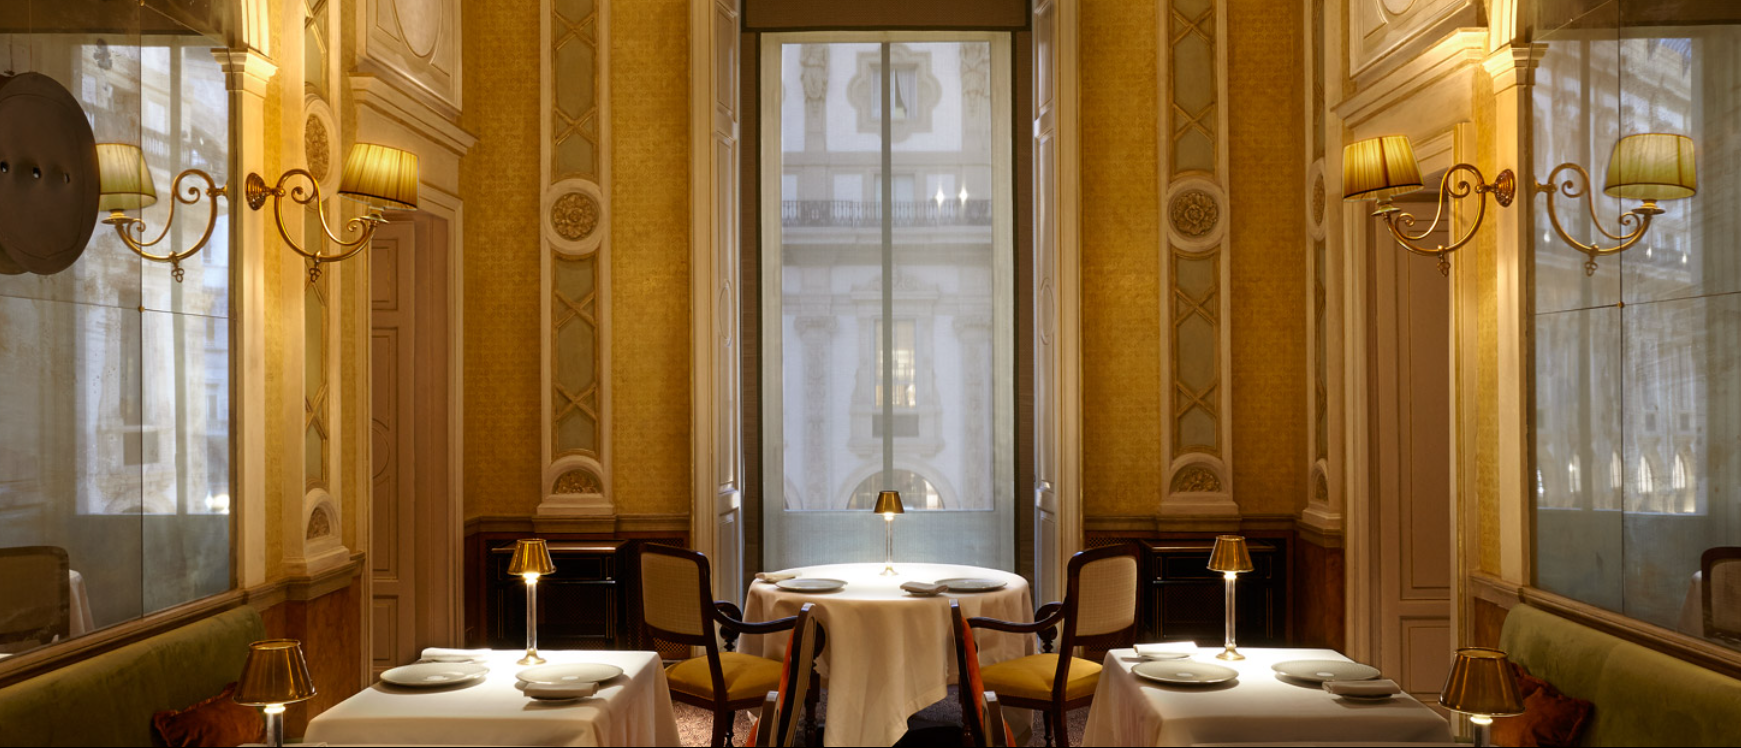

## **Data Collection**

Collecting the data from Yelp using BeautifulSoup (nice library for parsing HTML).

In [1]:
# Import Requests
import requests

# Import Beautiful Soup
from bs4 import BeautifulSoup

In [2]:
r = requests.get('https://www.yelp.com/biz/cracco-milano-2')

In [ ]:
r.text

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.findAll(class_=" raw__09f24__T4Ezm", attrs={'lang':'en'})
reviews = [result.text for result in results]

List of the reviews.

In [7]:
reviews

["I could tell that the restaurant service really really tried to maintain a pleasant atmosphere; however, the restaurant is extremely sub par....definitely not worth its label as one of the top 50 best restaurant in the world.My mother and I opted for the tasting menu and ate through 13 courses of very creative dishes. While the waiters moved smoothly (and were cute haha), about 10 of the 13 courses was bleh and I felt like it was either fusion gone wrong or photo opp trumps food taste. For instance, we started with dried vegetables with no salt and this finger food style candied rice cake with some creamy stuff inside. The dried vegetables with no salt sounds as bland as it tasted...I really don't understand why they served it? Like why? If anyone knows feel free to message me. The candied rice cake was disgusting. While they called it finger food, once I touched it, it collapsed and the creamy liquid of carrots and corn was all over my fingers....and yes creamy carrots and corn tast

## **Data classification**

Calculating sentiment score and adding a label 'sentiment' providing information of sentiment score on every review.


In [ ]:
pip install transformers

In [9]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

df = pd.DataFrame(np.array(reviews), columns=['review'])

In [10]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [11]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [12]:
sentiment_score(df['review'].iloc[1])

2

In [13]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [14]:
df

review  sentiment
0   I could tell that the restaurant service reall...          2
1   For lunch, this restaurant was disappointing. ...          2
2   Really? Named one of 50 best restaurants in th...          1
3   We went here on the last day of our honeymoon....          2
4   The restaurant was good. The food was creative...          2
5   We were on vacation and went to two Michelin s...          1
6   If you order their tasting menu, or, let the c...          4
7   Simultaneously reminding me of Alan Ducasse, A...          4
8   Cracco is supposed to be the top restaurant in...          2
9   I wanted to love this place, but sadly, I didn...          2
10  Elegant place, excellent service. Some items i...          4
11  Super-fance restaurant that serves course afte...          4
12  walk into an elegant first floor and you are i...          5
13  Very nice and professional wait staff. Food, e...          3
14  My wife and I were visiting Italy. Our last ni...          1
15  Creative food, out of the ordinary. Amazing fl...          4
16  very good in the beginning. I will try a la ca...          4

In [15]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))

## **Data cleaning**

Cleaning the data and prepairing it for modeling and visualization.

Eliminating stop words and lemmatizing the reviews.

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['stopword_count'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
df.head(10)

review  sentiment  word_count  \
0  I could tell that the restaurant service reall...          2         345   
1  For lunch, this restaurant was disappointing. ...          2          24   
2  Really? Named one of 50 best restaurants in th...          1          74   
3  We went here on the last day of our honeymoon....          2         432   
4  The restaurant was good. The food was creative...          2         111   
5  We were on vacation and went to two Michelin s...          1         229   
6  If you order their tasting menu, or, let the c...          4         167   
7  Simultaneously reminding me of Alan Ducasse, A...          4          78   
8  Cracco is supposed to be the top restaurant in...          2         161   
9  I wanted to love this place, but sadly, I didn...          2          92   

   stopword_count  
0             137  
1              10  
2              28  
3             183  
4              45  
5              96  
6              70  
7              25  
8              72  
9              42

In [18]:
df['review_lower'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')
df['review_nopunc_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [19]:
freq= pd.Series(" ".join(df['review_nopunc_nostop']).split()).value_counts()[:30]

In [20]:
freq.head()

food          20
restaurant    20
place         10
menu          10
tasting       10
dtype: int64

In [21]:
other_stopwords = ['get', 'us', 'see', 'use', 'said', 'asked', 'day', 'go' \
  'even', 'ive', 'right', 'left', 'always', 'would', 'told', \
  'get', 'us', 'would', 'get', 'one', 'ive', 'go', 'even', \
  'also', 'ever', 'x', 'take', 'let' ]

df['review_nopunc_nostop_nocommon'] = df['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in other_stopwords)))

In [22]:
from textblob import Word
nltk.download('wordnet')


df['cleaned_review'] = df['review_nopunc_nostop_nocommon'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [23]:
print('Base review\n', df['review'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['cleaned_review'][0])

Base review
 I could tell that the restaurant service really really tried to maintain a pleasant atmosphere; however, the restaurant is extremely sub par....definitely not worth its label as one of the top 50 best restaurant in the world.My mother and I opted for the tasting menu and ate through 13 courses of very creative dishes. While the waiters moved smoothly (and were cute haha), about 10 of the 13 courses was bleh and I felt like it was either fusion gone wrong or photo opp trumps food taste. For instance, we started with dried vegetables with no salt and this finger food style candied rice cake with some creamy stuff inside. The dried vegetables with no salt sounds as bland as it tasted...I really don't understand why they served it? Like why? If anyone knows feel free to message me. The candied rice cake was disgusting. While they called it finger food, once I touched it, it collapsed and the creamy liquid of carrots and corn was all over my fingers....and yes creamy carrots an

Sentiment analysis:


*   polarity - float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
*   subjectivity - Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 


In [24]:
from textblob import TextBlob
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])


In [25]:
df[['cleaned_review', 'polarity', 'subjectivity']].head(10)

cleaned_review  polarity  subjectivity
0  could tell restaurant service really really tr...  0.099524      0.595952
1  lunch restaurant disappointing pizza pasta fis... -0.050000      0.600000
2  really named 50 best restaurant world two mich...  0.300000      0.400000
3  went last honeymoon wanted treat wife somethin... -0.022946      0.405952
4  restaurant good food creative wait staff fair ...  0.256250      0.782143
5  vacation went two michelin star restaurant mon... -0.015833      0.508889
6  order tasting menu chef cook ready put large c...  0.326740      0.533394
7  simultaneously reminding alan ducasse alinea b...  0.100000      0.540741
8  cracco supposed top restaurant milan overrated...  0.225000      0.451026
9  wanted love place sadly didnt food terribly bl...  0.098889      0.703889

Adding new 'sentiment' label which will tell us if the review is positive or negative. Of course, this is determined by the polarity, but we cannot be 100% sure for the exact sentiment classification.

In [26]:
import numpy as np

df['sentiment'] = np.where(df['polarity'] > 0, 'Positive', 'Negative')

df[['cleaned_review', 'polarity', 'sentiment']].head(10)

cleaned_review  polarity sentiment
0  could tell restaurant service really really tr...  0.099524  Positive
1  lunch restaurant disappointing pizza pasta fis... -0.050000  Negative
2  really named 50 best restaurant world two mich...  0.300000  Positive
3  went last honeymoon wanted treat wife somethin... -0.022946  Negative
4  restaurant good food creative wait staff fair ...  0.256250  Positive
5  vacation went two michelin star restaurant mon... -0.015833  Negative
6  order tasting menu chef cook ready put large c...  0.326740  Positive
7  simultaneously reminding alan ducasse alinea b...  0.100000  Positive
8  cracco supposed top restaurant milan overrated...  0.225000  Positive
9  wanted love place sadly didnt food terribly bl...  0.098889  Positive

## **Data visualization**

Visualization using WordCloud, representing the most frequent keywords. In a wordcloud, the font size of words is directly proportional to the frequency of the word.

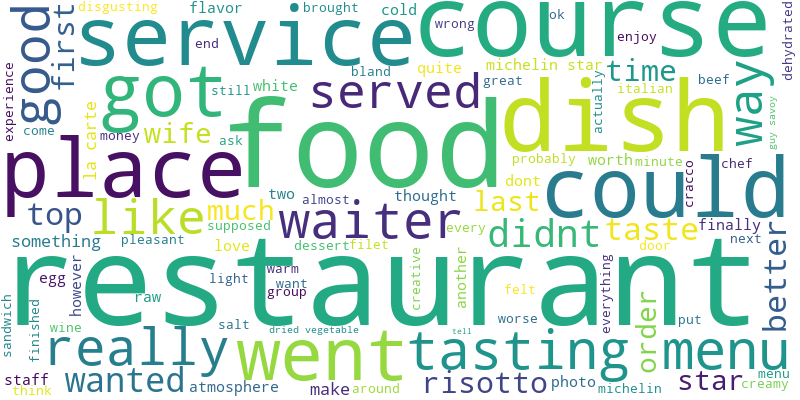

In [27]:
from wordcloud import WordCloud

txt = ','.join(list(df.cleaned_review.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",stopwords = stop_words, 
                      min_font_size = 5, width=800, height=400, 
                      max_words=100, contour_width=3, contour_color='steelblue').generate(txt)

# Visualize the word cloud
wordcloud.to_image()

--------Positive Reviews-------------


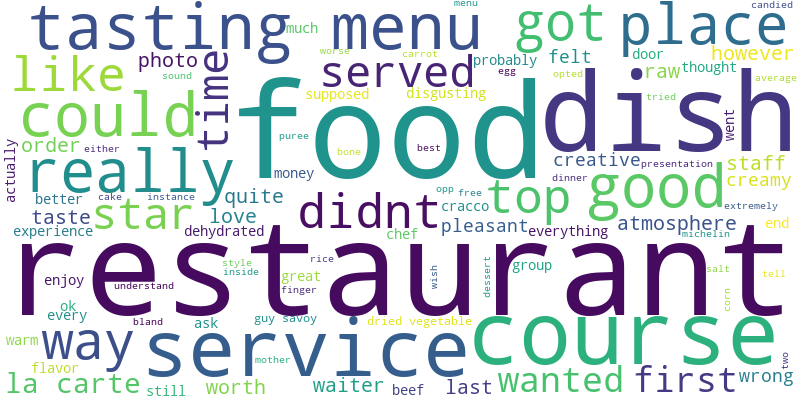

In [28]:
txt = ','.join(list(df[df.polarity > 0].cleaned_review.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",stopwords = stop_words, 
                      min_font_size = 5, width=800, height=400, 
                      max_words=100, contour_width=3, contour_color='steelblue').generate(txt)

# Visualize the word cloud
print("--------Positive Reviews-------------")
wordcloud.to_image()

--------Negative Reviews-------------


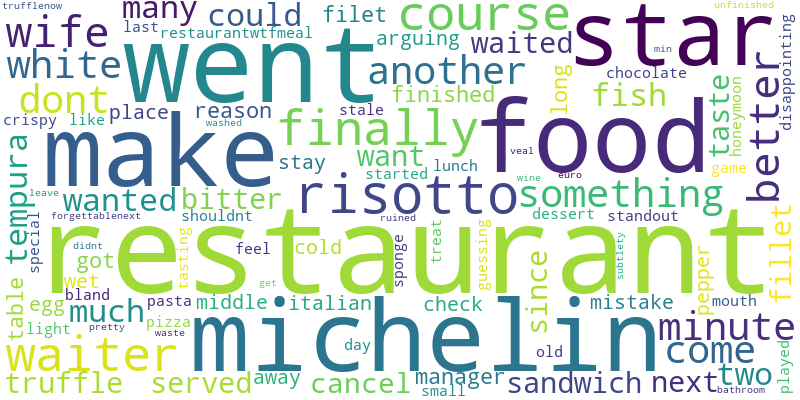

In [29]:
txt = ','.join(list(df[df.polarity < 0].cleaned_review.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",stopwords = stop_words, 
                      min_font_size = 5, width=800, height=400, 
                      max_words=100, contour_width=3, contour_color='steelblue').generate(txt)

# Visualize the word cloud
print("--------Negative Reviews-------------")
wordcloud.to_image()

From the negative reviews, we can conclude that risotto is a frequent complaint and the waiter service.

## **Feature generation using Bag of Words**

Generating a Bag-of-words(BoW) for extracting features. BoW converts text into the matrix of the frequency of words.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer


token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['cleaned_review'])

print(text_counts.shape)

(17, 695)


In [32]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


10  12  13  15  1st  2  20  25  2nd  3  ...  worldmy  worse  worth  \
0   1   0   2   0    0  0   0   0    0  0  ...        1      1      2   
1   0   0   0   0    0  0   0   0    0  0  ...        0      0      0   
2   0   0   0   0    0  0   0   0    0  0  ...        0      0      0   
3   1   1   0   1    0  1   0   1    0  0  ...        0      1      0   
4   0   0   0   0    0  0   0   0    0  0  ...        0      0      0   

   wouldnt  wow  write  wrong  yelp  yes  zero  
0        0    0      0      2     0    1     1  
1        0    0      0      0     0    0     0  
2        0    0      0      0     0    0     0  
3        0    0      0      0     1    0     0  
4        0    0      0      0     0    0     0  

[5 rows x 695 columns]

## **Predictive modeling**

Splitting the dataset into a training set and a test set.
Evaluation with MultinomialNB and RandomForestClassifier.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    df['sentiment'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [34]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3333333333333333


Accuracy rate of 33.33% using BoW features, which is a fairly bad accuracy. We can still improve this performance by trying different classification methods.

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)
print("RandomForestClassifier Accuracy:", metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier Accuracy: 0.8333333333333334


Accuracy rate of 83.33% with RandomForestClassifier. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

In [43]:
val=cv.transform(["Service of the restaurant is very slow but food was delicious"])

# make prediction
clf.predict(val)

array(['Positive'], dtype='<U8')

Making predictions based on input review. The following review will probably go down as **positive** based on the information that the food was delicious as a strong keyword.